# <center>Steam Game Data Analytics</center>
### <center>Web Mining Project</center>
- **Mission statement:**
    - Analyze the game review data on Steam platform and try to make some explorative deployment.
        - Sentiment analytics
        - Product development advice
        - Player’s behavior analysis
        - Game recommendation
        - Popular game prediction
- **Team Members:**
    - Fanyu WANG.    fwang15@stevens.edu
    - Fu YANG.       fyang24@stevens.edu
    - Kai ZHANG.     kzhang32@stevens.edu
    - Shuai WANG.    swang111@stevens.edu

## 1. Scrape Data from Steam Platform

- Dyamic Web Page Scraping with Selenium 
    - References:
        - http://selenium-python.readthedocs.io/getting-started.html
        - https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72
- Scape HTML web pages using BeatifulSoup
    - References: 
        - https://www.dataquest.io/blog/web-scraping-tutorial-python/
        - https://www.crummy.com/software/BeautifulSoup/bs4/doc/#

In [36]:
# import requests package
import requests                   

# import BeautifulSoup from package bs4 (i.e. beautifulsoup4)
from bs4 import BeautifulSoup    

import re

### Ⅰ. Selenium
- this is not a function, but you can run it independently to test the performance of this method.

In [37]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions
# import time

# executable_path = 'F:\geckodriver'

# driver = webdriver.Firefox(executable_path=executable_path)

# driver.get('https://steamcommunity.com/app/435150/reviews/?p=1&browsefilter=toprated')

# src_updated = driver.page_source
# src = ""

# for i in range(0,190):
#     if src != src_updated:
#         # save page source (i.e. html document) before page-down
#         src = src_updated
#         # execute javascript to scroll to the bottom of the window
#         # you can also use page-down
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         # sleep to allow content loaded
#         time.sleep(1)
#         # save page source after page-down
#         src_updated = driver.page_source


# # What can we get about the reviews from Steam?

# # The review content, post date, how many people think this review helpful or funny

# review_content=[]
# usefuls=[]

# for i in range(1,191):
#     # get all Q&A list using XPATH locator
#     lists=driver.find_elements_by_xpath("//div[@id='page%d']/div"%i)
# #     print("//div[@id='page%d']/div"%i)
# #     print("page%d pairs: "%i,len(lists))
    
#     for idx,item in enumerate(lists):    
#     # each Q&A pair has an unique ID
#         div_id=item.get_attribute("id")
#         content_css="div#"+div_id+" "+"div.apphub_UserReviewCardContent div.apphub_CardTextContent"
#         useful_css="div#"+div_id+" "+"div.apphub_UserReviewCardContent div.found_helpful"
        
#         review=driver.find_element_by_css_selector(content_css)
#         useful=driver.find_element_by_css_selector(useful_css)
#         review_content.append(review.text)
#         usefuls.append(useful.text)

# print("Total reviews scraped: ", len(review_content), len(usefuls))
# # print(review_content[0])
# # print(usefuls[0])

# import pandas as pd
# import nltk
# import re

# reviews =[]
# dates = []

# # print(type(data[0]),str(data[0]))

# for line in review_content:
#     sentence = line.split("\n")
#     date = re.sub(r"Posted:"," ",sentence[0]).strip()
#     review = re.sub(r"Posted:.*"," ",line)
#     review = re.sub(r"\s+"," ",review).strip() 
#     reviews.append(review)
#     dates.append(date)
    
# # print("date:",dates[0])
# # print("content:",reviews[0])



# df = pd.DataFrame()
# df["review"] = reviews
# df["post_date"] = dates
# df["useful"] = usefuls
# df.to_csv('game_review.csv',index=True)

### Ⅱ. BeatifulSoup
**sometimes Selenium webdriver is not stable**

In [53]:
def web_scrape(address):
    # store user_name 
    nicks=[]
    # store recommendation information
    titles=[]
    # store hours the player played
    hours=[]
    # store review information
    comments=[]
    # store the number of people who thinks that this review is helpful
    helpfuls=[]
    # store the number of people who thinks that this review is funny
    funnys=[]
    # store the date the user commented
    dates=[]
    # store the number of games the user has
    products=[]
    # scrape 10 reviews per time
    # therefore we scraped 2000 reviews
    for i in range(1, 201):
        # simulate the network requests
        url =  address + '/homecontent/?userreviewsoffset=' + str(10 * (i - 1)) + '&p=' + str(i) + '&workshopitemspage=' + str(i) + '&readytouseitemspage=' + str(i) + '&mtxitemspage=' + str(i) + '&itemspage=' + str(i) + '&screenshotspage=' + str(i) + '&videospage=' + str(i) + '&artpage=' + str(i) + '&allguidepage=' + str(i) + '&webguidepage=' + str(i) + '&integratedguidepage=' + str(i) + '&discussionspage=' + str(i) + '&numperpage=10&browsefilter=toprated&browsefilter=toprated&appid=435150&appHubSubSection=10&l=senglish&filterLanguage=default&searchText=&forceanon=1'
        html = requests.get(url).text.replace('<br>',' ')
        soup = BeautifulSoup(html, 'html.parser') 
        # scrape the information which we focus on
        reviews = soup.find_all('div', {'class': 'apphub_Card'})    
        for review in reviews:
            nick = review.find('div', {'class': 'apphub_CardContentAuthorName'})
            nicks.append(nick.text)
            title = review.find('div', {'class': 'title'}).text
            titles.append(title)
            hour = review.find('div', {'class': 'hours'}).text.split(' ')[0]
            hours.append(hour)
            product = review.find('div', {'class': 'apphub_CardContentMoreLink ellipsis'}).text.split()
            # this content may be null. when it is null, we think it equals to zero
            if len(product)==4:
                products.append(product[0])
            else:
                products.append('0')
            #link = nick.find('a').attrs['href']
            comment = review.find('div', {'class': 'apphub_CardTextContent'}).text
            temp=comment.split('\n')
            # there will be unwanted information. so we skip them.
            if len(temp)==3:
                comments.append(temp[2].strip('\t'))
            else:
                comments.append(temp[3].strip('\t'))
            # delete string "Posted: " since it is unused
            date = re.sub(r"Posted:"," ",comment.split('\n')[1].strip('\t')).strip()
            dates.append(date)
            helpful = review.find('div', {'class': 'found_helpful'}).text.split()[0]
            helpfuls.append(helpful)
            #helpful1 = review.find('div', {'class': 'found_helpful'}).text.split()[6]
            #funny = re.findall(r"\d+",review.find('div', {'class': 'found_helpful'}).text.split()[5])
            funny = review.find('div', {'class': 'found_helpful'}).text.split()
            # this content may be null. when it is null, we think it equals to zero
            if len(funny)==12:
                funnys.append(funny[6])
            else:
                funnys.append('0')
                
    # generate dataframe to store web information
    df = pd.DataFrame()
    df["names"] = nicks
    df["products#"] = products
    df["marked as helpful"] = helpfuls
    df["marked as funny"] = funnys
    df["post_date"] = dates
    df["Recommend?"] = titles
    df["times on record"] = hours
    df["review"] = comments
    
    # generate csv file
    # df.to_csv('game_data_negative.csv',index=False)
    return df

## 2. Reviw Data Tokenization and normalization

In [39]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import numpy as np
import os

### Ⅰ. POS (Part of Speech) Tagging
- The process of marking up a word in a text as corresponding to a particular part of speech (e.g. nouns, verbs, adjectives, adverbs etc.), based on both **its definition**, as well as its **context** — adjacent and related words in a phrase, sentence, or paragraph. 

In [40]:
def get_wordnet_pos(pos_tag):
    
    # if pos tag starts with 'J'
    if pos_tag.startswith('J'):
        # return wordnet tag "ADJ"
        return wordnet.ADJ

    # if pos tag starts with 'V'
    elif pos_tag.startswith('V'):
        # return wordnet tag "VERB"
        return wordnet.VERB

    # if pos tag starts with 'N'
    elif pos_tag.startswith('N'):
        # return wordnet tag "NOUN"
        return wordnet.NOUN

    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        # be default, return wordnet tag "NOUN"
        return wordnet.NOUN

### Ⅱ. Tokenization

- the process of breaking a stream of textual content up into words, terms, symbols, or some other meaningful elements called tokens.
    * Word (Unigram)
    * Bigram (Two consecutive words)
    * Trigram (Three consecutive words)
    * Sentence

In [41]:
def tokenize(data):
    
    # Lemmatization: determining the lemma for a given word
    wordnet_lemmatizer = WordNetLemmatizer()
    
    # Regular expression pattern
    pattern = r'\w[\w\'-]*\w'
    
    init_reviews = []
    init_helpfuls = []
    stop_words = stopwords.words('english')
    stop_words.append("game")
    
    review = data["review"].values.tolist()
    helpfuls = data["marked as helpful"].values.tolist()
    
    for doc in review:
        doc = doc.lower()
        tokens = nltk.regexp_tokenize(doc, pattern)
        tagged_tokens= nltk.pos_tag(tokens)
        lemmatized_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) \
              for (word, tag) in tagged_tokens \
              if word not in stop_words and word not in string.punctuation]
        temp_str = ""
        for item in lemmatized_words:
            temp_str = temp_str + " " + item
        init_reviews.append(temp_str[1:])
    
    # convert "No" to "0"
    for line in helpfuls:
        if line=="No":
            init_helpfuls.append("0")
        else:
            init_helpfuls.append(line)
        
    # Generate csv file to save data without unuseful information.
    df = pd.DataFrame()
    df["user_name"] = data["names"].values.tolist()
    df["user_product"] = data["products#"].values.tolist()
    df["helpful"] = init_helpfuls
    df["funny"] = data["marked as funny"].values.tolist()
    df["post_date"] = data["post_date"].values.tolist()
    df["recommend_or_not"] = data["Recommend?"].values.tolist()
    df["game_time"] = data["times on record"].values.tolist()
    df["review"] = init_reviews
    # obtain the row index when contents of reviews are empty
    indx = df[df.review==''].index.tolist()
    # delete the corresponding datasets
    df1=df.drop(df.index[indx])
    # delete the duplicate datasets
    df1.drop_duplicates(subset ="user_name", 
                     keep = False, inplace = True)
    df1.to_csv('C:/Users/yongk/Documents/PythonLearning/Steam Data Analysis/Data_main/tokened_normed_review_test.csv',index=False)
    # this method generate a dataframe with tokenized data sets
    return df1

### Ⅲ. Merge mupltiple csv files into a single one

In [42]:
def merge_csv():
    Folder_Path = r'C:\Users\yongk\Documents\PythonLearning\Steam Data Analysis\Data_main'          
    SaveFile_Path =  r'C:\Users\yongk\Documents\PythonLearning\Steam Data Analysis\Data_main'       
    SaveFile_Name = r'game_data_all.csv'              
 
    os.chdir(Folder_Path)
    # save file names into a list
    file_list = os.listdir()
 
    # read the first csv including headers
    df = pd.read_csv(Folder_Path +'\\'+ file_list[0])   #default utf-8
 
    # write the first csv to second one
    df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False)
 
    # loop through all files
    for i in range(1,len(file_list)):
        df = pd.read_csv(Folder_Path + '\\'+ file_list[i])
        df.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8_sig",index=False, header=False, mode='a+')

### Ⅳ. getdata function
- generate a datafram to store all data
- generate a csv file to store all data

In [43]:
def getdata():
    # obtain data including positive and negative reviews
    data_positive = web_scrape(address_positive)
    data_negative = web_scrape(address_negative)
    # concat two dataframes
    data = pd.concat([data_positive,data_negative],ignore_index=True)
    # generate csv files to store two dataframes
    data_positive.to_csv('C:/Users/yongk/Documents/PythonLearning/Steam Data Analysis/Data_main/game_data_positive.csv',index=False)
    data_negative.to_csv('C:/Users/yongk/Documents/PythonLearning/Steam Data Analysis/Data_main/game_data_negative.csv',index=False)
    # merge multiple csv
    merge_csv()# game_data_all.csv
    return data

## 3. Exploratory Data Analysis

### I.  Sentiment analysis
- Analysis data with Naive way based on positive words and negative words.

In [1]:
import pandas as pd

def naive_approach(token_path,posi_word_path,nega_word_path):
    '''
    This function take a csv file with tokenized review column as input
    and return a dataframe with additional columns 'positive freq' and 'negative freq'
    Args:
        token_path: file path of 'tokened_normed_review_v2.csv'
        posi_word_path: file path of 'positive-words.txt'
        nega_word_path: file path of 'negative-words.txt'
    Return:
        data: dataframe created from the csv file with two new columns 'positive freq' and 'negative freq'
    '''

    data = pd.read_csv(token_path,header = 0)
    with open(posi_word_path, 'r') as f1:
        positive_words = [line.strip() for line in f1]
    with open(nega_word_path, 'r') as f2:
        negative_words = [line.strip() for line in f2]
        
    reviews = list(data['review'])
    positive_tokens = []
    negative_tokens = []
    for doc in reviews:
        doc_positive_tokens = [token for token in doc.split()
                           if token in positive_words]
        positive_tokens.append(len(doc_positive_tokens)/len(doc))

        doc_negative_tokens = [token for token in doc.split()
                          if token in negative_words]
        negative_tokens.append(len(doc_negative_tokens)/len(doc))
        
    data['positive freq'] = positive_tokens
    data['negative freq'] = negative_tokens
    data['attitude']=data['positive freq']-data['negative freq']
    return data


## II. Try to find variable relations by scatter plot
- Reviews with neutral attitude get more 'funny' from other players
- Long reviews are not easy to get more 'funny' 

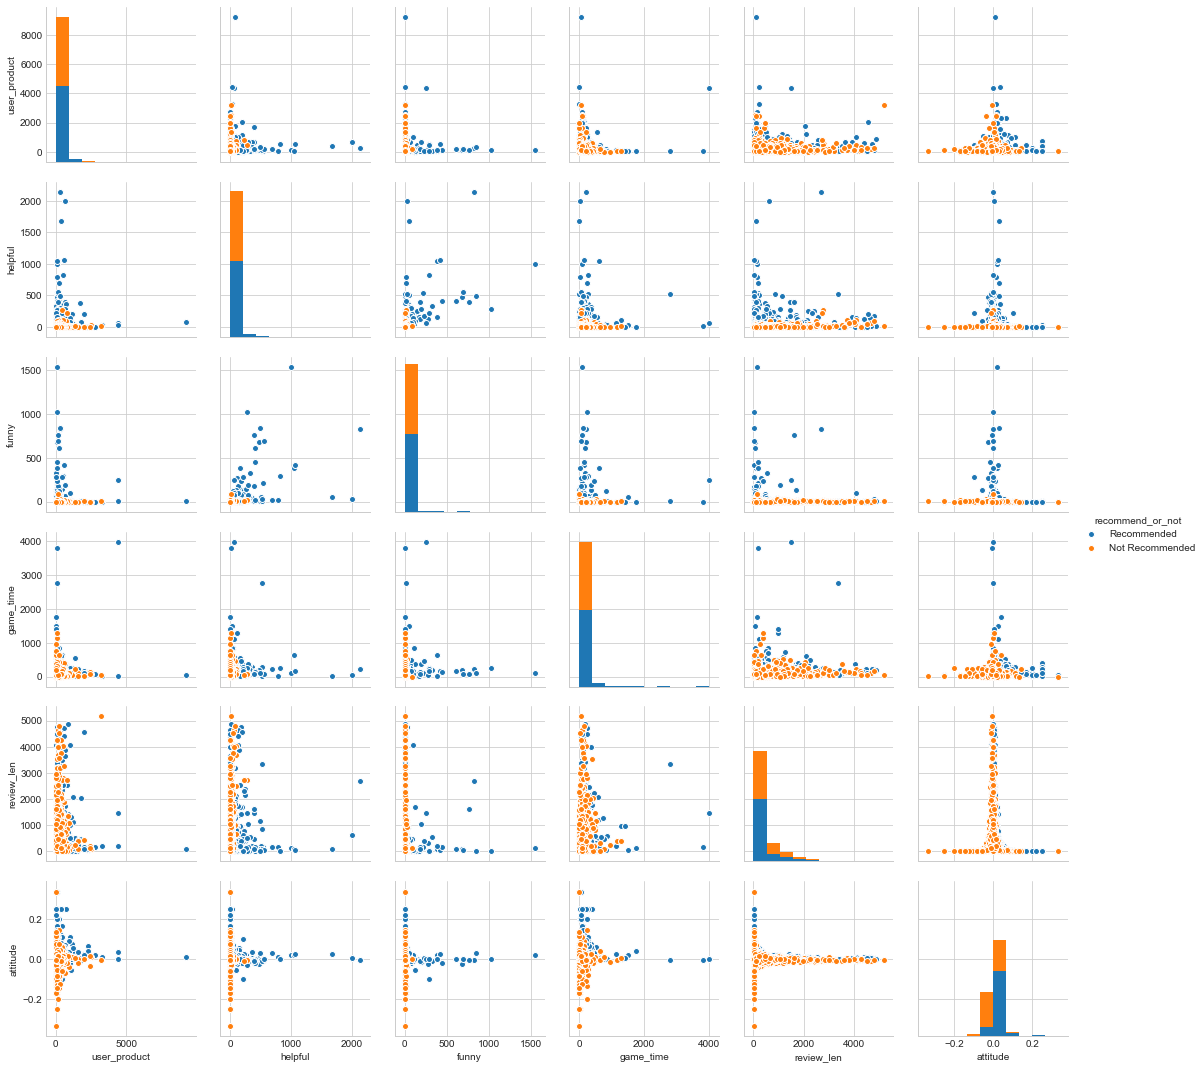

In [2]:
token_path = 'tokened_normed_review_v2.csv'
posi_word_path = 'positive-words.txt'
nega_word_path = 'negative-words.txt'
data = naive_approach(token_path,posi_word_path,nega_word_path)
data.user_product=data.user_product.apply(lambda x :x.replace(',','')).astype(int)
data.helpful=data.helpful.apply(lambda x :x.replace(',','')).astype(int)
data.funny=data.funny.apply(lambda x :x.replace(',','')).astype(int)
data.game_time=data.game_time.apply(lambda x :x.replace(',','')).astype(float)
data['review_len']=data.review.apply(lambda x: len(x))
data.head()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid");
sns.pairplot(data=data, 
             x_vars=['user_product','helpful','funny','game_time','review_len','attitude'], 
             y_vars=['user_product','helpful','funny','game_time','review_len','attitude'], 
             hue='recommend_or_not')

### III. Term Frequency and Inverse Dcoument Frequency (TF-IDF) Analysis

In [50]:
# This function is to tokenalize normal review before we do TF-IDF #
def get_doc_tokens(doc):
    stop_words = stopwords.words('english')
    stop_words.append("game")
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc) if token.strip() not in stop_words and\
               token.strip() not in string.punctuation]
    # create token count dictionary
    token_count={token:tokens.count(token) for token in set(tokens)}
    return token_count


# This function is to get TF-IDF matrix #
def get_tf_idf(reviews):
    
    docs_tokens={idx:get_doc_tokens(doc) for idx,doc in enumerate(reviews)}

    # since we have a small corpus, we can use dataframe to get document-term matrix
    dtm=pd.DataFrame.from_dict(docs_tokens, orient="index" )
    dtm=dtm.fillna(0)
    # convert dtm to numpy arrays
    tf=dtm.values

    # sum the value of each row
    doc_len=tf.sum(axis=1)

    # divide dtm matrix by the doc length matrix
    tf=np.divide(tf, doc_len[:,None])

    # get document freqent
    df=np.where(tf>0,1,0)

    # get idf
    smoothed_idf=np.log(np.divide(len(reviews)+1, np.sum(df, axis=0)+1))+1

    # get tf-idf
    smoothed_tf_idf=tf*smoothed_idf
    
    return smoothed_tf_idf

In [51]:
from scipy.spatial import distance

# This function is to get the most similarity review given a review_id #
def find_similar_doc(doc_id, smoothed_tf_idf):
    similarity=1-distance.squareform(distance.pdist(smoothed_tf_idf, 'cosine'))
    
    # find top doc similar to first one
    best_matching_doc_id = np.argsort(similarity)[:,::-1][doc_id,0:2][1]
    similarity = similarity[doc_id,best_matching_doc_id]  
    return best_matching_doc_id, similarity

## 4. Test
- Collect datasets (positive and negative reviews)
    * user_name, votes, how much products in account, hours to play and so on
    * store data into a single dataframe
    * store data into a signle csv file
- Tokenize datasets
    * for convinience, convert symbols to number. (eg. "No" to "0")
    * remove the words in stop_words list (which is posted in class)
    * remove the words (game and games) since the frequency is too high and they are negligible words
    * remove the unrecognized words (they may be Chinese or other language, emoji and so on)
    * remove the datasets with reviews which are empty after tokenization
    * remove the duplicate datesets since there is an iterative scraping issue (we define there will be 10 reviews every page, but in fact, the number is random based on the length of reviews).
- Data Analysis
    - Sentiment Analysis
    - TF-IDF analysis
        - Find the index of most similar document

In [54]:
if __name__ == "__main__":
    
# Test "Scrape Data from Steam Platform"
    address_positive = 'https://steamcommunity.com/app/435150/positivereviews'
    # https://steamcommunity.com/app/435150/
    address_negative = 'http://steamcommunity.com/app/435150/negativereviews'
    data = getdata() # get raw datasets
    print(len(data))
    
# Test "Data Tokenization and normalization"
    tokenized_data = tokenize(data)
    print(len(tokenized_data))
    
# Test "Exploratory Data Analysis"
    # scatter plot 
    token_path = 'tokened_normed_review_v2.csv'
    posi_word_path = 'positive-words.txt'
    nega_word_path = 'negative-words.txt'
    data = naive_approach(token_path,posi_word_path,nega_word_path)
    data.user_product=data.user_product.apply(lambda x :x.replace(',','')).astype(int)
    data.helpful=data.helpful.apply(lambda x :x.replace(',','')).astype(int)
    data.funny=data.funny.apply(lambda x :x.replace(',','')).astype(int)
    data.game_time=data.game_time.apply(lambda x :x.replace(',','')).astype(float)
    data['review_len']=data.review.apply(lambda x: len(x))
    data.head()
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    sns.set_style("whitegrid");
    sns.pairplot(data=data, 
                 x_vars=['user_product','helpful','funny','game_time','review_len','attitude'], 
                 y_vars=['user_product','helpful','funny','game_time','review_len','attitude'], 
                 hue='recommend_or_not')    
    
    
    # TF-IDF Analysis
    reviews = tokenized_data["review"].values.tolist()
    tf_idf = get_tf_idf(reviews)
    print("Smoothed TF-IDF Matrix")
    print(tf_idf)
    
    print(find_similar_doc(1,tf_idf))

3151
1992
Smoothed TF-IDF Matrix
[[0.13617387 0.02614374 0.07240039 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01908747 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06143779 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01204663 0.         ... 0.01937316 0.01937316 0.01937316]]
(919, 0.21090363467253592)
